# <center> <h1>  👩🏿‍🦰👨👨🏾‍🦰👱‍♀️ 🧑‍💻  👱‍♀👨🏾‍🦰👨👩🏿‍🦰

In [1]:
import numpy as np
import keras
import tensorflow as tf
import math
from keras.models import Model, Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Input, concatenate, GlobalAveragePooling2D, AveragePooling2D, Flatten
import matplotlib.pyplot as plt
from keras.applications import InceptionV3
from tensorflow.keras.utils import image_dataset_from_directory


### Inception (V1/V2/V3) is a CNN neural network based on a deep learning model developed by the Google team. InceptionV3 is an improved and optimized version of InceptionV1 and V2.



### In 2014, Inception V1 won the ImageNet competition with an accuracy rate of 89.6% for its image classification model. It was followed by V2 and V3 versions. The Inception V3 model can now be downloaded and used in Tensorflow. Currently, the most famous YOLO algorithm was created by GoogleNet(Inception).

* `The architecture of GoogleNet or Inception V1 is as follows`

The entry looks like this

A 7x7 filter is first applied to the input image, then 3x3 MaxPoolling and so on.

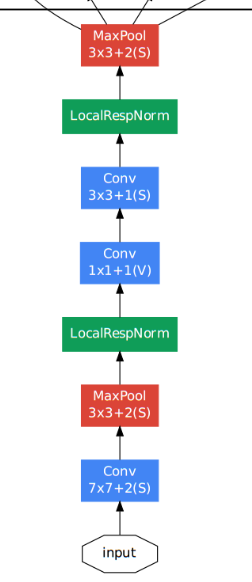

After the introduction, the Inception module (layer) is used

* `Inception consists of a total of 9 inception modules (layers).`

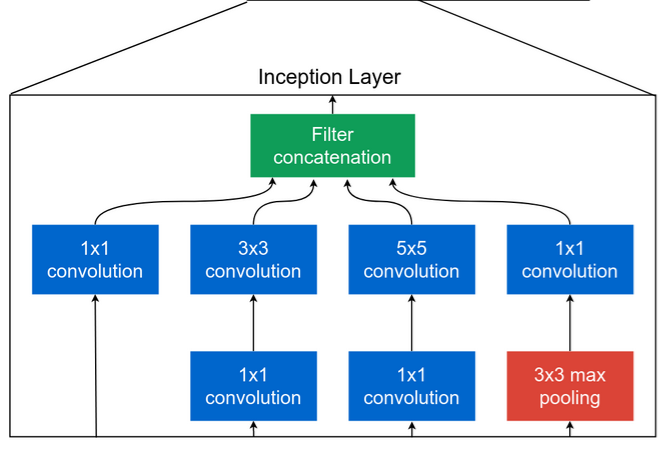

* It consists of 2 auxiliary and 1 main classifier



`An overview of our architecture is as follows:`



`Below is a picture in good format, take a closer look.`


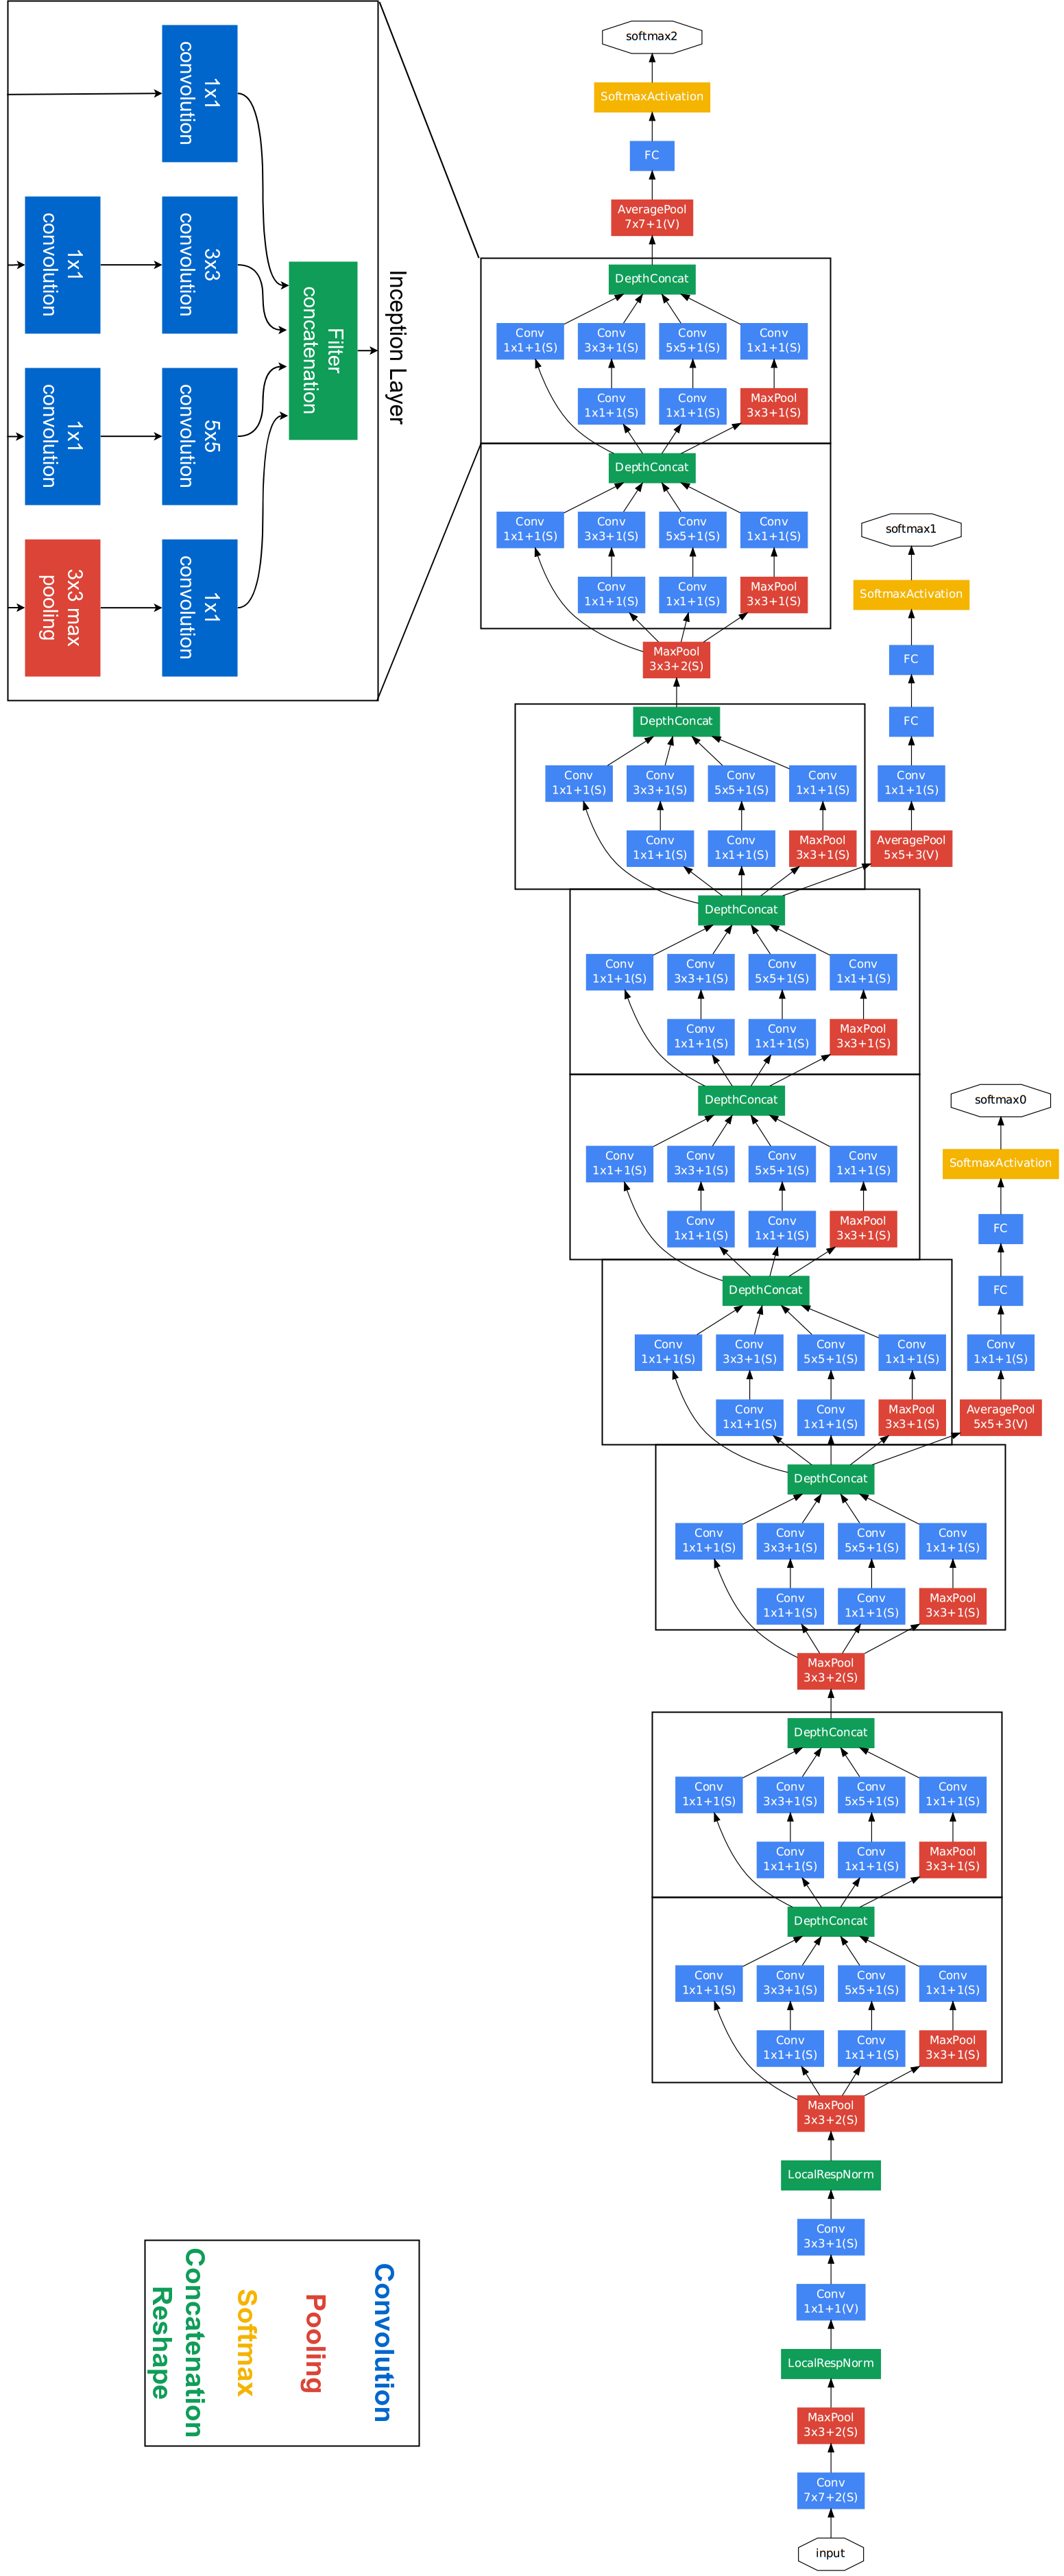

### `We build Inception V1 from scratch`

below are filter, maxpool, stride and others used in our architecture.

## Step 1. Let's create a function for the Inception module

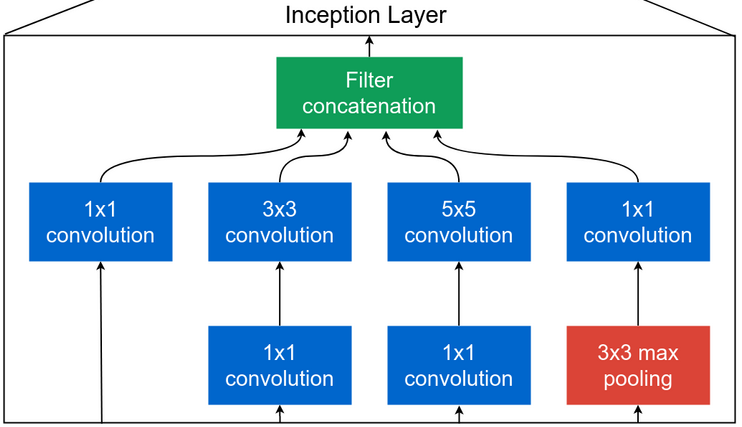

In [2]:
def inception_module(x, filters_1, filters_2_1, filters_2_2, filters_3_1, filters_3_2, filters_4_1, name=None):
    
    conv_1 = Conv2D(filters_1, (1,1), padding="same", activation="relu")(x)
    
    conv_2 = Conv2D(filters_2_1, (1,1), padding="same", activation="relu")(x)
    conv_2 = Conv2D(filters_2_2, (3,3), padding="same", activation="relu")(conv_2)
    
    conv_3 = Conv2D(filters_3_1, (1,1), padding="same", activation="relu")(x)
    conv_3 = Conv2D(filters_3_2, (5,5), padding="same", activation="relu")(conv_3)
    
    
    conv_4 = MaxPool2D((3,3), strides=(1,1), padding="same")(x)
    conv_4 = Conv2D(filters_4_1, (1,1), padding="same", activation="relu")(conv_4)

    
    output = concatenate([conv_1, conv_2, conv_3, conv_4], axis=3, name=name)

    
    return output

In [6]:
# input layer
input_layer = Input(shape=(224,224,3))

# 64ta 7x7 filter ,
x = Conv2D(64, (7,7), padding="same", strides=(2,2), activation="relu", name="conv_1_7x7/2")(input_layer)

# 3x3 MaxPool
x = MaxPool2D((3,3), padding="same", strides=(2,2), name="max_pool_1_3x3/2")(x)

# 64 ta 1x1 filter 
x = Conv2D(64, (1,1), padding="same", strides=(1,1), activation="relu", name="conv_2a_3x3/1")(x)

# 192 ta 3x3 filtr
x = Conv2D(192, (3,3), padding="same", strides=(1,1), activation="relu", name="conv_2b_3x3/1")(x)

# 3x3 MaxPool
x = MaxPool2D((3,3), padding="same", strides=(2,2), name="max_pool_2_3x3/2")(x)


# 1-inception module
x = inception_module(x, filters_1=64, filters_2_1=96, filters_2_2=128, filters_3_1=16, filters_3_2=32, filters_4_1=32, name="inception_3a")
# 2-inception module
x = inception_module(x, filters_1=128, filters_2_1=128, filters_2_2=192, filters_3_1=32, filters_3_2=96, filters_4_1=64, name="inception_3b")

x = MaxPool2D((3,3), padding="same", strides=(2,2), name="max_pool_3_3x3/2")(x)

# 3-inception module
x = inception_module(x, filters_1=192, filters_2_1=96, filters_2_2=208, filters_3_1=16, filters_3_2=48, filters_4_1=64, name="inception_4a")


# 1-classifier
x1 = AveragePooling2D((5,5), strides=3)(x)
x1 = Conv2D(128, (1,1), padding="same", activation="relu")(x1)
x1 = Flatten()(x1)
x1 = Dense(1024,activation="relu")(x1)
x1 = Dropout(0.7)(x1)
x1 = Dense(10, activation="softmax", name="output_1")(x1)


# 4-inception module
x = inception_module(x, filters_1=160, filters_2_1=112, filters_2_2=224, filters_3_1=24, filters_3_2=64, filters_4_1=64, name="inception_4b")

# 5-inception module
x = inception_module(x, filters_1=128, filters_2_1=128, filters_2_2=256, filters_3_1=24, filters_3_2=64, filters_4_1=64, name="inception_4c")

# 6-inception module
x = inception_module(x, filters_1=112, filters_2_1=144, filters_2_2=288, filters_3_1=32, filters_3_2=64, filters_4_1=64, name="inception_4d")

# 2-classifier
x2 = AveragePooling2D((5,5), strides=3)(x)
x2 = Conv2D(128, (1,1), padding="same", activation="relu")(x2)
x2 = Flatten()(x2)
x2 = Dense(1024, activation="relu")(x2)
x2 = Dropout(0.7)(x2)
x2 = Dense(10, activation="softmax", name="output_2")(x2)

# 7-inception module
x = inception_module(x, filters_1=256, filters_2_1=160, filters_2_2=320, filters_3_1=32, filters_3_2=128, filters_4_1=128, name="inception_4e")

x = MaxPool2D((3,3), padding="same", strides=(2,2), name="max_pool_4_3x3/2")(x)

# 8-inception module
x = inception_module(x, filters_1=256, filters_2_1=160, filters_2_2=320, filters_3_1=32, filters_3_2=128, filters_4_1=128, name="inception_5")

# 9-inception module
x = inception_module(x, filters_1=384, filters_2_1=192, filters_2_2=384, filters_3_1=48, filters_3_2=128, filters_4_1=128, name="inception_5b")

# 3-classifier
x = AveragePooling2D((7,7), strides=2, name="avg_pool_5_3x3/1")(x)
x = Dropout(0.4)(x)
x = Dense(10, activation="softmax", name="output_3")(x)




In [7]:
model = Model(input_layer, [x,x1,x2], name="inception_v1")

In [8]:
model.summary()

Model: "inception_v1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv_1_7x7/2 (Conv2D)          (None, 112, 112, 64  9472        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 max_pool_1_3x3/2 (MaxPooling2D  (None, 56, 56, 64)  0           ['conv_1_7x7/2[0][0]']           
 )                                                                                     

 conv2d_78 (Conv2D)             (None, 14, 14, 24)   12312       ['inception_4a[0][0]']           
                                                                                                  
 max_pooling2d_12 (MaxPooling2D  (None, 14, 14, 512)  0          ['inception_4a[0][0]']           
 )                                                                                                
                                                                                                  
 conv2d_75 (Conv2D)             (None, 14, 14, 160)  82080       ['inception_4a[0][0]']           
                                                                                                  
 conv2d_77 (Conv2D)             (None, 14, 14, 224)  226016      ['conv2d_76[0][0]']              
                                                                                                  
 conv2d_79 (Conv2D)             (None, 14, 14, 64)   38464       ['conv2d_78[0][0]']              
          

 conv2d_103 (Conv2D)            (None, 7, 7, 32)     26656       ['max_pool_4_3x3/2[0][0]']       
                                                                                                  
 max_pooling2d_16 (MaxPooling2D  (None, 7, 7, 832)   0           ['max_pool_4_3x3/2[0][0]']       
 )                                                                                                
                                                                                                  
 conv2d_100 (Conv2D)            (None, 7, 7, 256)    213248      ['max_pool_4_3x3/2[0][0]']       
                                                                                                  
 conv2d_102 (Conv2D)            (None, 7, 7, 320)    461120      ['conv2d_101[0][0]']             
                                                                                                  
 conv2d_104 (Conv2D)            (None, 7, 7, 128)    102528      ['conv2d_103[0][0]']             
          

In [9]:
model.compile(loss=["sparse_categorical_crossentropy", "sparse_categorical_crossentropy", "sparse_categorical_crossentropy"], optimizer="adam", metrics="accuracy")


### Let's read the dataset

In [2]:
train_data_dir = "Datasets/gender/train"
test_data_dir = "Datasets/gender/test"

In [3]:
train_data = image_dataset_from_directory(train_data_dir, image_size=(224,224,))

Found 1876 files belonging to 2 classes.


In [4]:
test_data = image_dataset_from_directory(test_data_dir, image_size=(224,224,))

Found 470 files belonging to 2 classes.


In [22]:
# we can transfer the data to list and then to numpy to make it convenient for us to work
x_train = []
y_train = []
# convert to list

for i in train_data:
    for j in i[0]:
        a = j / 255
        x_train.append(a)
        
    for j in i[1]:
        y_train.append(j)

In [23]:
x_train

[<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.06305147, 0.10226715, 0.09834559],
         [0.05664418, 0.09585986, 0.09193829],
         [0.04996252, 0.0891782 , 0.08525664],
         ...,
         [0.3657873 , 0.44739553, 0.3809771 ],
         [0.2531382 , 0.3354214 , 0.26786196],
         [0.3262255 , 0.4079657 , 0.3334559 ]],
 
        [[0.06574755, 0.10496324, 0.10104167],
         [0.06656203, 0.10577772, 0.10185615],
         [0.0674114 , 0.10662708, 0.10270552],
         ...,
         [0.27251363, 0.34406605, 0.28075135],
         [0.28093883, 0.35974628, 0.29310593],
         [0.3925245 , 0.46519607, 0.3916054 ]],
 
        [[0.05814951, 0.09736519, 0.09344362],
         [0.06162465, 0.10084033, 0.09691876],
         [0.0652486 , 0.10446429, 0.10054272],
         ...,
         [0.40764394, 0.4701684 , 0.4089552 ],
         [0.330718  , 0.39490676, 0.33280075],
         [0.24166666, 0.30373776, 0.23468137]],
 
        ...,
 
        [[0.4908088 , 0.6502451 

In [24]:
y_train

[<tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32

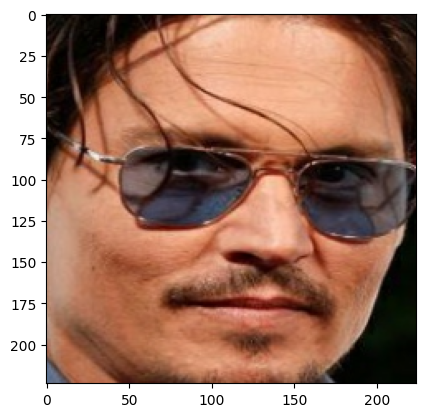

In [32]:
plt.imshow(x_train[7])

In [33]:
x_test = []
y_test = []
# Convert to list

for i in test_data:
    
    for j in i[0]:
        a = j / 255
        x_test.append(a)
        
    for j in i[1]:
        y_test.append(j)

In [34]:
x_test

[<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.10196079, 0.08627451, 0.09019608],
         [0.14304096, 0.12735468, 0.13127625],
         [0.18636206, 0.17067578, 0.17459735],
         ...,
         [0.06952921, 0.06560764, 0.08521549],
         [0.08722881, 0.08330724, 0.10291509],
         [0.09803922, 0.09411765, 0.11372549]],
 
        [[0.08806022, 0.07237395, 0.07629552],
         [0.12147648, 0.10579021, 0.10971177],
         [0.16031401, 0.14462774, 0.1485493 ],
         ...,
         [0.05565962, 0.05173805, 0.0713459 ],
         [0.06517555, 0.06125398, 0.08086182],
         [0.07023809, 0.06631652, 0.08592436]],
 
        [[0.10851716, 0.09283088, 0.09675245],
         [0.12868562, 0.11299936, 0.11692093],
         [0.15456337, 0.13807562, 0.14440161],
         ...,
         [0.04119612, 0.03727455, 0.05688239],
         [0.04502924, 0.04110767, 0.06071552],
         [0.04760154, 0.04367997, 0.06328782]],
 
        ...,
 
        [[0.0584207 , 0.1493608 

In [35]:
y_test

[<tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32

In [36]:
# convert to numpy
x_train = np.array(x_train, dtype=np.float32)
x_train

array([[[[0.06305147, 0.10226715, 0.09834559],
         [0.05664418, 0.09585986, 0.09193829],
         [0.04996252, 0.0891782 , 0.08525664],
         ...,
         [0.3657873 , 0.44739553, 0.3809771 ],
         [0.2531382 , 0.3354214 , 0.26786196],
         [0.3262255 , 0.4079657 , 0.3334559 ]],

        [[0.06574755, 0.10496324, 0.10104167],
         [0.06656203, 0.10577772, 0.10185615],
         [0.0674114 , 0.10662708, 0.10270552],
         ...,
         [0.27251363, 0.34406605, 0.28075135],
         [0.28093883, 0.35974628, 0.29310593],
         [0.3925245 , 0.46519607, 0.3916054 ]],

        [[0.05814951, 0.09736519, 0.09344362],
         [0.06162465, 0.10084033, 0.09691876],
         [0.0652486 , 0.10446429, 0.10054272],
         ...,
         [0.40764394, 0.4701684 , 0.4089552 ],
         [0.330718  , 0.39490676, 0.33280075],
         [0.24166666, 0.30373776, 0.23468137]],

        ...,

        [[0.4908088 , 0.6502451 , 0.6761642 ],
         [0.541687  , 0.705956  , 0.7374679 ]

In [37]:
# convert to numpy
y_train = np.array(y_train, dtype=np.uint8)
y_train

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [38]:
# convert to numpy
x_test = np.array(x_test, dtype=np.float32)
x_test

array([[[[1.01960786e-01, 8.62745121e-02, 9.01960805e-02],
         [1.43040955e-01, 1.27354681e-01, 1.31276250e-01],
         [1.86362058e-01, 1.70675784e-01, 1.74597353e-01],
         ...,
         [6.95292130e-02, 6.56076446e-02, 8.52154866e-02],
         [8.72288123e-02, 8.33072439e-02, 1.02915086e-01],
         [9.80392173e-02, 9.41176489e-02, 1.13725491e-01]],

        [[8.80602226e-02, 7.23739490e-02, 7.62955174e-02],
         [1.21476479e-01, 1.05790205e-01, 1.09711774e-01],
         [1.60314009e-01, 1.44627735e-01, 1.48549303e-01],
         ...,
         [5.56596220e-02, 5.17380536e-02, 7.13458955e-02],
         [6.51755482e-02, 6.12539761e-02, 8.08618218e-02],
         [7.02380911e-02, 6.63165227e-02, 8.59243646e-02]],

        [[1.08517155e-01, 9.28308815e-02, 9.67524499e-02],
         [1.28685623e-01, 1.12999357e-01, 1.16920926e-01],
         [1.54563367e-01, 1.38075620e-01, 1.44401610e-01],
         ...,
         [4.11961153e-02, 3.72745469e-02, 5.68823926e-02],
         [

In [39]:
# convert to numpy
y_test = np.array(y_test, dtype=np.uint8)
y_test

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,

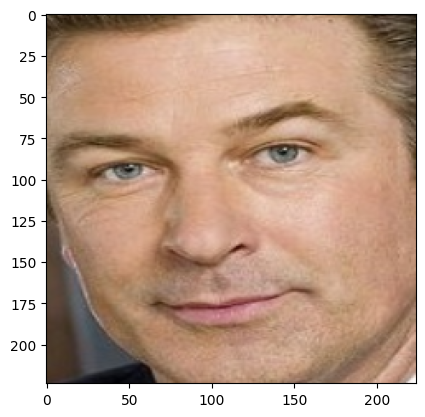

In [43]:
plt.imshow(x_train[12])

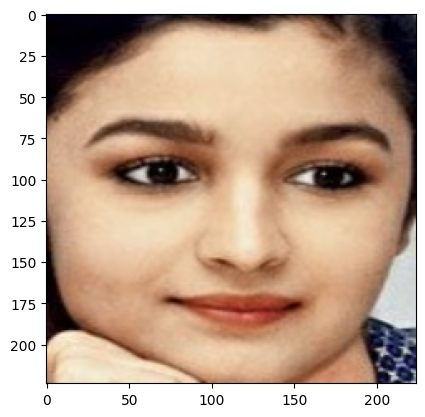

In [58]:
plt.imshow(x_test[14])

In [59]:
x_train[0].shape

(224, 224, 3)

In [60]:
type(x_train)

numpy.ndarray

In [61]:
y_train = np.expand_dims(y_train, -1)
y_train

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=uint8)

In [62]:
y_train.shape

(1876, 1)

In [63]:
y_test = np.expand_dims(y_test, -1)
y_test

array([[1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
    

In [64]:
y_test.shape

(470, 1)

In [33]:
with tf.device('/CPU:0'):
    model.fit(x_train, [y_train, y_train, y_train], epochs=10)


Epoch 1/10
59/59 [==============================] - 213s 3s/step - loss: 2.4676 - output_3_loss: 0.8396 - output_1_loss: 0.7947 - output_2_loss: 0.8333 - output_3_accuracy: 0.4884 - output_1_accuracy: 0.5027 - output_2_accuracy: 0.4797
Epoch 2/10
59/59 [==============================] - 189s 3s/step - loss: 2.0695 - output_3_loss: 0.6976 - output_1_loss: 0.6803 - output_2_loss: 0.6916 - output_3_accuracy: 0.4929 - output_1_accuracy: 0.5762 - output_2_accuracy: 0.5480
Epoch 3/10
59/59 [==============================] - 206s 3s/step - loss: 1.9385 - output_3_loss: 0.6707 - output_1_loss: 0.6172 - output_2_loss: 0.6506 - output_3_accuracy: 0.5045 - output_1_accuracy: 0.6647 - output_2_accuracy: 0.6594
Epoch 4/10
59/59 [==============================] - 210s 4s/step - loss: 1.7611 - output_3_loss: 0.6474 - output_1_loss: 0.5363 - output_2_loss: 0.5774 - output_3_accuracy: 0.5107 - output_1_accuracy: 0.7559 - output_2_accuracy: 0.7148
Epoch 5/10
59/59 [==============================] - 194s

In [34]:
model.evaluate(x_test,[y_test, y_test, y_test])
# if we notice we have 3 accuracies we can get any accuracies we want from these 3 or best of them

15/15 [==============================] - 12s 169ms/step - loss: 0.9106 - output_3_loss: 0.2981 - output_1_loss: 0.3017 - output_2_loss: 0.3109 - output_3_accuracy: 0.5031 - output_1_accuracy: 0.8702 - output_2_accuracy: 0.8702


[0.9106032848358154,
 0.2980651259422302,
 0.3016524910926819,
 0.3108857274055481,
 0.5031039118766785,
 0.8702127933502197,
 0.8702127933502197]

# <center> Now let's try using Inception V3 in tensorflow. 

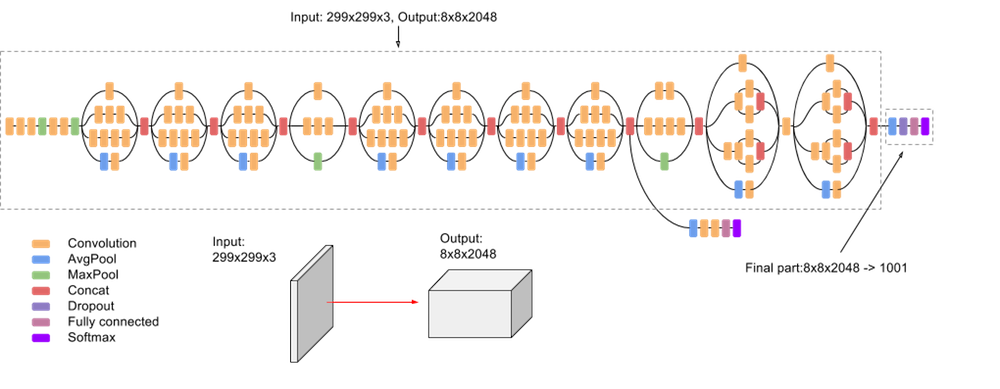

In [13]:
# dataset we read above
list(train_data)

[(<tf.Tensor: shape=(32, 224, 224, 3), dtype=float32, numpy=
  array([[[[ 30.790178 ,  38.79018  ,  51.79018  ],
           [ 29.970982 ,  37.970985 ,  50.970985 ],
           [ 29.164816 ,  37.164814 ,  50.164814 ],
           ...,
           [ 70.09601  ,  75.15923  ,  94.127625 ],
           [ 67.49553  ,  72.66742  ,  91.581474 ],
           [ 65.20982  ,  70.20982  ,  89.20982  ]],
  
          [[ 28.685268 ,  36.68527  ,  49.68527  ],
           [ 28.1239   ,  36.1239   ,  49.1239   ],
           [ 28.       ,  36.       ,  49.       ],
           ...,
           [ 68.83708  ,  75.06921  ,  93.45314  ],
           [ 66.61717  ,  73.88503  ,  91.75111  ],
           [ 66.0558   ,  71.685265 ,  90.37054  ]],
  
          [[ 28.524553 ,  36.524555 ,  49.524555 ],
           [ 28.094841 ,  36.09484  ,  49.09484  ],
           [ 28.366486 ,  36.366486 ,  49.366486 ],
           ...,
           [ 62.74026  ,  71.0759   ,  88.40808  ],
           [ 61.28239  ,  70.110466 ,  87.19643  ],

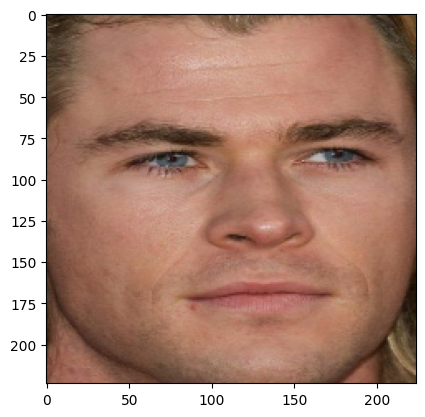

In [14]:
plt.imshow(list(train_data)[0][0][0].numpy().astype("uint8"))

In [15]:
classes = train_data.class_names
classes

['man', 'woman']

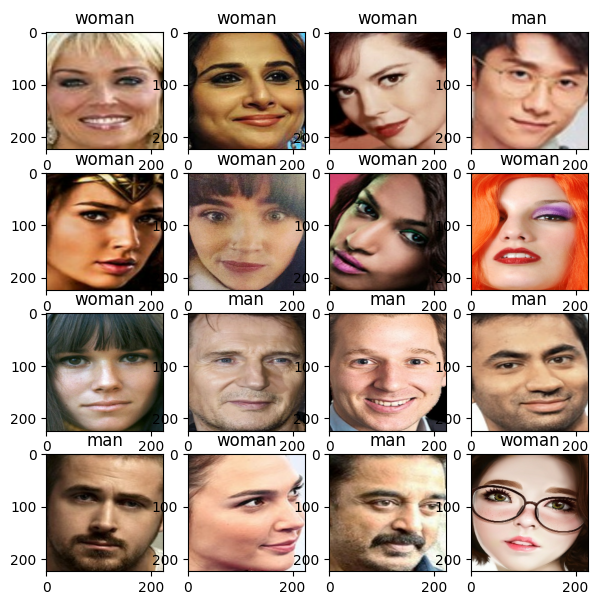

In [16]:
plt.figure(figsize=(7,7))
for image, label in train_data.take(1):
    
    for i in range(16):
        ax = plt.subplot(4,4,i+1)
        plt.title(classes[label[i]])
        plt.imshow(image[i].numpy().astype("uint8"))

In [5]:
inceptionv3 = InceptionV3(include_top=False, input_shape=(224,224,3))
inceptionv3

In [6]:
# Since Inception v3 is for 1000 classes, we can customize it for 2 classes
inceptionv3_2 = Sequential([
    inceptionv3,
    Flatten(),
    Dense(100, activation="relu"),
    Dense(2, activation="softmax")
])

In [7]:
inceptionv3_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 100)               5120100   
                                                                 
 dense_1 (Dense)             (None, 2)                 202       
                                                                 
Total params: 26,923,086
Trainable params: 26,888,654
Non-trainable params: 34,432
_________________________________________________________________


In [8]:
inceptionv3_2.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")

In [9]:
with tf.device("/GPU:0"):
    inceptionv3_2.fit(train_data, epochs=10)

Epoch 1/10
59/59 [==============================] - 123s 2s/step - loss: 1.4766 - accuracy: 0.7249
Epoch 2/10
59/59 [==============================] - 27s 389ms/step - loss: 0.3984 - accuracy: 0.9414
Epoch 3/10
59/59 [==============================] - 23s 387ms/step - loss: 0.3454 - accuracy: 0.9622
Epoch 4/10
59/59 [==============================] - 23s 387ms/step - loss: 0.3076 - accuracy: 0.9680
Epoch 5/10
59/59 [==============================] - 23s 387ms/step - loss: 0.3035 - accuracy: 0.9675
Epoch 6/10
59/59 [==============================] - 23s 388ms/step - loss: 0.2558 - accuracy: 0.9872
Epoch 7/10
59/59 [==============================] - 23s 388ms/step - loss: 0.2397 - accuracy: 0.9808
Epoch 8/10
59/59 [==============================] - 23s 388ms/step - loss: 0.2334 - accuracy: 0.9760
Epoch 9/10
59/59 [==============================] - 23s 388ms/step - loss: 0.2027 - accuracy: 0.9888
Epoch 10/10
59/59 [==============================] - 23s 388ms/step - loss: 0.1881 - accuracy

In [10]:
inceptionv3_2.evaluate(test_data)

15/15 [==============================] - 9s 224ms/step - loss: 0.1978 - accuracy: 0.9766


[0.1977827399969101, 0.9765957593917847]

### <center> As you can see Incepton V3 performed better.

# <center> <h1>  👨‍💻   🚀  